In [3]:
import sqlite3

1. Set up the Database
   1. **Create a connection** to an SQLite database file named student_grades.db. If the 
database file does not exist, SQLite will automatically create it
   2. Create a cursor object to interact with the database.

In [5]:
#1. 
connection = sqlite3.connect('student_grades.db')

#2. 
cursor = connection.cursor()

2. Create the Necessary Tables
You will need two tables for this assignment:
• students: A table to store student information.
• grades: A table to store student grades for different subjects.
The structure of the tables should be as follo**ws:
stu**dents table:
• student_id (INTEGER, Primary Key, Auto-increment)
• first_name (TEXT)
• last_nam
**grades** table:
• grade_id (INTEGER, Primary Key, Auto-increment)
• student_id (INTEGER, Foreign Key linked to students table)
• subject (TEXT)
• grade (INTEER)e (TEXT)

In [7]:
#Deletes tables if already exists. 
cursor.execute('DROP TABLE IF EXISTS grades')
cursor.execute('DROP TABLE IF EXISTS students')

# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')
print("students table created!")

# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER NOT NULL,
    subject TEXT NOT NULL,
    grade INTEGER NOT NULL,
    FOREIGN KEY (student_id) REFERENCES students(student_ID)
)
''')
print("grades table created!")

cursor.close()

students table created!
grades table created!


3. Insert Data into the Tables
Insert at least 5 students into the students table and at least 3 grades for each student int 
the grades tablle:

In [9]:
# Sample data to insert into the student table
student_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

grade_data = [
    (1, "Math", 95),
    (1, "English", 88),
    (1, "History", 90),
    (2, "Math", 82),
    (2, "English", 76),
    (2, "History", 85),
    (3, "Math", 89),
    (3, "English", 92),
    (3, "History", 87),
    (4, "Math", 78),
    (4, "English", 84),
    (4, "History", 80),
    (5, "Math", 91),
    (5, "English", 79),
    (5, "History", 88)
]

In [14]:
cursor = connection.cursor()

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', student_data)

connection.commit()

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grade_data)

# Commit the transaction
connection.commit()

cursor.close()

4. **Perform SQL Queries**
Write SQL queries to answer the following questions:

    1. Retrieve all students' names and their grades.

In [12]:
cursor = connection.cursor()

cursor.execute('''
SELECT first_name, last_name, GROUP_CONCAT(grade) AS grades
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
rows = cursor.fetchall()
print("Student Grades:")
for row in rows:
    print(row)

Student Grades:
('Alice', 'Johnson', '95,88,90')
('Bob', 'Smith', '82,76,85')
('Carol', 'White', '89,92,87')
('David', 'Brown', '78,84,80')
('Eve', 'Davis', '91,79,88')


2. Find the average grade for each student.

In [14]:
cursor.execute('''
SELECT first_name, last_name, ROUND(AVG(grade),2) AS grades
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
rows = cursor.fetchall()
print("Student Grades:")
for row in rows:
    print(f"{row[0]} {row[1]} - Average grade: {row[2]}")

Student Grades:
Alice Johnson - Average grade: 91.0
Bob Smith - Average grade: 81.0
Carol White - Average grade: 89.33
David Brown - Average grade: 80.67
Eve Davis - Average grade: 86.0


3. Find the student with the highest average grade.

In [16]:
cursor.execute('''
SELECT first_name, last_name, MAX(avg_grades) AS max_average_grade
FROM(
    SELECT first_name, last_name, AVG(grade) AS avg_grades
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    )
''')
rows = cursor.fetchall()
print("Student Grades:")
for row in rows:
    print(row)

Student Grades:
('Alice', 'Johnson', 91.0)


4. Find the average grade for the Math subject.

In [18]:
cursor.execute('''
SELECT * FROM (
SELECT subject AS subject, AVG(grade) AS avg_grade FROM grades
GROUP BY subject
) WHERE subject = "Math"
''')
rows = cursor.fetchall()
print("Student Grades:")
for row in rows:
    print(row)

Student Grades:
('Math', 87.0)


5. List all students who scored above 90 in any subject.

In [20]:
cursor.execute('''
SELECT first_name, last_name FROM
(
SELECT * 
FROM students
JOIN grades ON grades.student_id = students.student_id
) WHERE grade > 90
''')
rows = cursor.fetchall()
print("Student who scored above 90:")
for row in rows:
    print(row)

Student who scored above 90:
('Alice', 'Johnson')
('Carol', 'White')
('Eve', 'Davis')


5. **Load Data into Pandas**
    1. Use Pandas to load the data from the students and grades tables into DataFrames.

In [22]:
import pandas as pd

students = pd.read_sql_query('SELECT * FROM students', connection)
grades = pd.read_sql_query('SELECT * FROM grades', connection)

    2. Use JOIN queries to combine the data from both tables into a single DataFrame that 
includes each student's name, subject, and grade

In [24]:
combinedDf = pd.read_sql_query('SELECT first_name, last_name, subject, grade FROM students JOIN grades ON grades.student_id = students.student_id', connection)
combinedDf.head()

first_name last_name  subject  grade
0      Alice   Johnson     Math     95
1      Alice   Johnson  English     88
2      Alice   Johnson  History     90
3        Bob     Smith     Math     82
4        Bob     Smith  English     76

    3. Visualize the data with Matplotlib:
        a.  Plot the average grades for each student
        b. o Create a bar chart showing the average grade for each subject

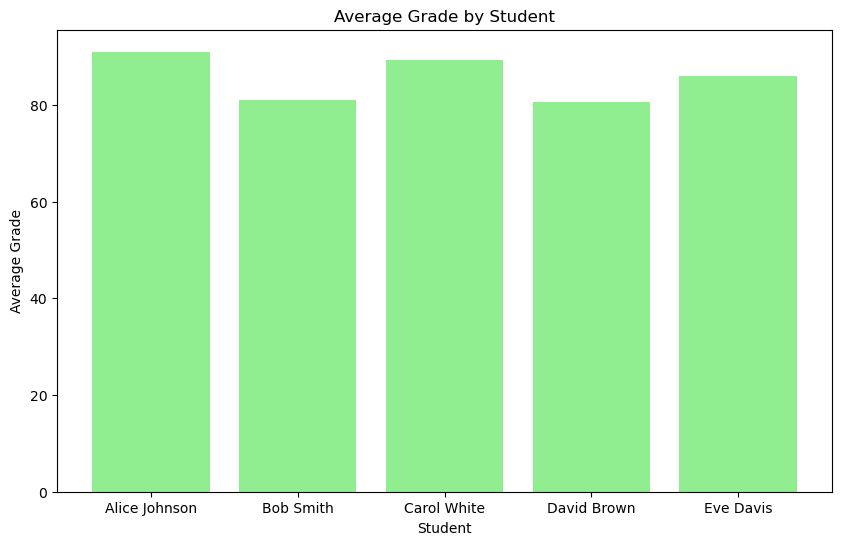

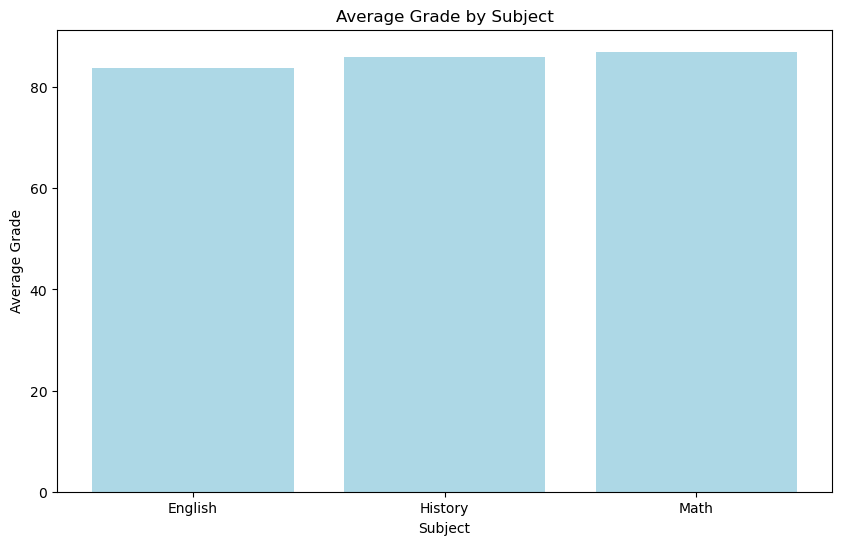

In [26]:
import matplotlib.pyplot as plt

averageStudent = pd.read_sql_query(
    '''SELECT CONCAT(first_name," ", last_name) AS 'Full Name', ROUND(AVG(grade),2) AS 'Average grade'
    FROM students
    JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ''', connection)

# Plot sales data
plt.figure(figsize=(10,6))
plt.bar(averageStudent['Full Name'], averageStudent['Average grade'], color='lightgreen')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade by Student')
plt.show()

averageGrade = pd.read_sql_query('''SELECT subject AS Subject, AVG(grade) AS "Average grade" FROM grades
GROUP BY subject''', connection)

plt.figure(figsize=(10,6))
plt.bar(averageGrade['Subject'], averageGrade['Average grade'], color='lightblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade by Subject')
plt.show()

Bonus Task: (5pts)
• Implement a query that finds the student with the highest grade in each subject.
• Visualize the results using a grouped bar chart

In [28]:
topScore = pd.read_sql_query(
'''
SELECT subject, CONCAT(first_name, " ", last_name) AS 'Full name', MAX(grade) AS 'Top grade' from grades
JOIN students ON students.student_id = grades.student_id
GROUP BY subject
''', connection)

topScore.head()

subject      Full name  Top grade
0  English    Carol White         92
1  History  Alice Johnson         90
2     Math  Alice Johnson         95

In [110]:
topScore2 = pd.read_sql_query(
'''
SELECT CONCAT(first_name," ", last_name) AS 'Full name', subject, grade FROM grades
JOIN students ON students.student_id = grades.student_id
ORDER BY grade DESC
''', connection)

topScore2.head()

#I can't figure out how to visualize it

Full name  subject  grade
0  Alice Johnson     Math     95
1    Carol White  English     92
2      Eve Davis     Math     91
3  Alice Johnson  History     90
4    Carol White     Math     89